In [13]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the tips dataset
tips = sns.load_dataset('tips')
X = tips[['total_bill', 'size']]
y = tips['tip']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN regressor with k=5
knn = KNeighborsRegressor(n_neighbors=195)

# Fit the KNN model to the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 1.4486680232392766


In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 228 to 102
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  195 non-null    float64
 1   size        195 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.6 KB


In [2]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the performance of the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 1.0


In [20]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# How to find best number of n_neighbours()

In [30]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a KNN classifier
knn = KNeighborsClassifier()

# find the numbder of neighbors by grid search cv
param_grid = {'n_neighbors': np.arange(3, 21), 
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'weights' : ['uniform', 'distance'],
              'p' : [1, 2]}

# grid search cv
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print('Best n_neighbors:', grid_search.best_params_['n_neighbors'])
print('Best algorithm:', grid_search.best_params_['algorithm'])
print('Best weights:', grid_search.best_params_['weights'])
print('Best p:', grid_search.best_params_['p'])
print('Best score:', grid_search.best_score_)


Best n_neighbors: 12
Best algorithm: auto
Best weights: uniform
Best p: 1
Best score: 0.9619047619047618


# Plotting KNN

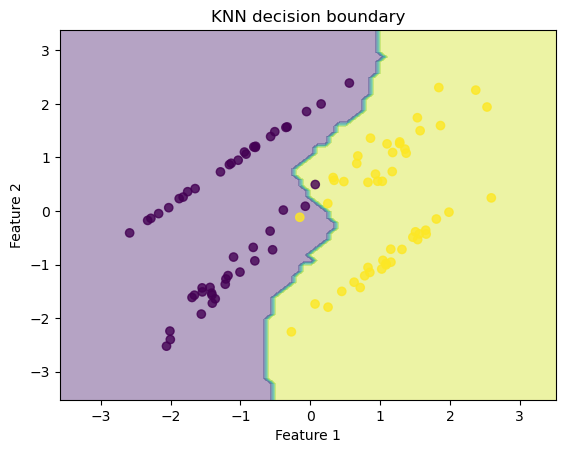

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Generate random data for classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the data
knn.fit(X, y)

# Define the range of the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid of points to plot the decision boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN decision boundary')
plt.show()


In this example, we first generate random data for classification using Scikit-learn's make_classification function. We create a KNN classifier with n_neighbors=5, and fit the model to the data using the fit method.

Next, we define the range of the plot and create a meshgrid of points to plot the decision boundary. We use the predict method to predict the class labels for each point in the meshgrid, and reshape the predictions to match the shape of the meshgrid.

Finally, we plot the decision boundary using the contourf function and scatter plot the data points using the scatter function. We also add labels and a title to the plot, and show the plot using the show function.

Note that the specific hyperparameters and plot settings used in this example can be customized based on your preferences and the specific machine learning problem at hand.

# Keep Working Hard!